In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
warnings.filterwarnings("ignore")
%matplotlib inline
df = pd.read_csv('google_cleaned.csv')

In [4]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
day                  0
month                0
year                 0
dtype: int64

In [10]:
df.isnull().sum().sort_values(ascending = False)

Size              1695
Rating            1474
Current Ver          8
Android Ver          2
Type                 1
App                  0
Category             0
Reviews              0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
day                  0
month                0
year                 0
dtype: int64

In [14]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,NaN,10000000,Free,0.0,Everyone,Productivity,2018-04-06,Varies with device,Varies with device,6,4,2018
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,NaN,1000000,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device,6,8,2018
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,NaN,100000000,Free,0.0,Everyone,Productivity,2018-06-27,Varies with device,Varies with device,27,6,2018
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86.0,10000,Free,0.0,Everyone,Medical,2018-06-01,0.6.88,5.0 and up,1,6,2018


In [15]:
df = df.drop_duplicates()

In [19]:
df.shape

(10357, 16)

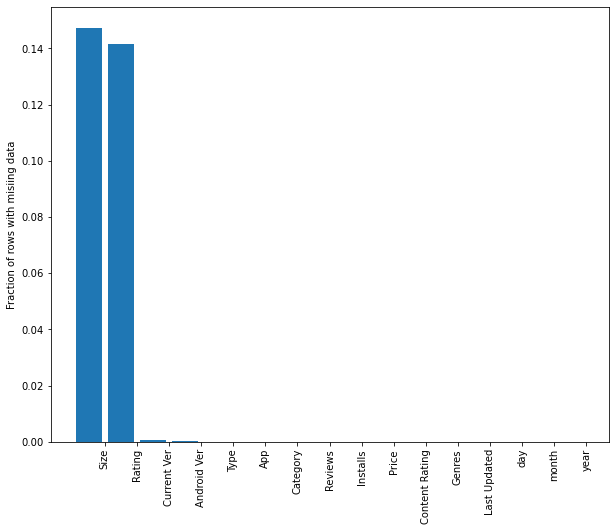

In [26]:
# plot for null values percentage count

null_count = df.isnull().sum().sort_values(ascending = False)/len(df)
plt.figure(figsize = (10,8))
plt.xticks(np.arange(len(null_count)) + 0.5 , null_count.index , rotation ="vertical")
plt.ylabel("Fraction of rows with misiing data")
plt.bar(np.arange(len(null_count)) , null_count)
plt.show()

In [34]:
# to create list of cols with null values
df_copy = df.copy()

In [35]:
cols = [var for var in df_copy.columns if df_copy[var].isnull().mean()*100]

In [36]:
cols

['Rating', 'Size', 'Type', 'Current Ver', 'Android Ver']

In [38]:
df_copy[cols]

,Rating,Size,Type,Current Ver,Android Ver
0,4.1,19.0,Free,1.0.0,4.0.3 and up
1,3.9,14.0,Free,2.0.0,4.0.3 and up
2,4.7,8.7,Free,1.2.4,4.0.3 and up
3,4.5,25.0,Free,Varies with device,4.2 and up
4,4.3,2.8,Free,1.1,4.4 and up
...,...,...,...,...,...
10835,4.5,53.0,Free,1.48,4.1 and up
10836,5.0,3.6,Free,1.0,4.1 and up
10837,NaN,9.5,Free,1.0,2.2 and up
10838,4.5,NaN,Free,Varies with device,Varies with device


In [39]:
drop_df = df_copy[cols].dropna()

In [42]:
drop_df.shape # df with no null values

(7418, 5)

In [43]:
df_copy.shape

(10357, 16)

In [44]:
drop_df.isnull().sum()

Rating         0
Size           0
Type           0
Current Ver    0
Android Ver    0
dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='Density'>

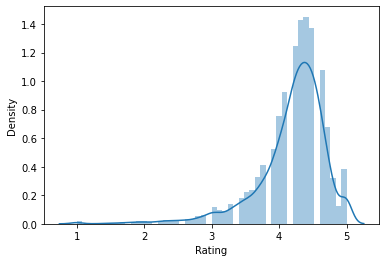

In [45]:
# Distribution of data before and after droppig null values
sns.distplot(df_copy["Rating"])

<AxesSubplot:xlabel='Rating', ylabel='Density'>

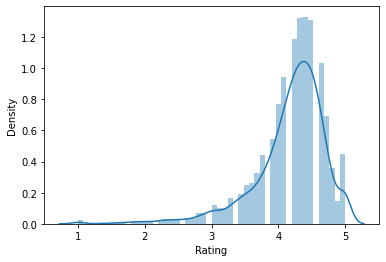

In [46]:
sns.distplot(drop_df['Rating'])

In [47]:
# NO majore changes in distribution after droppinf so we can take drop method

### mean , meadian ,mode

In [48]:
df_copy_me = df.copy()

In [55]:
# mean
df_copy_me['Size'].fillna(df_copy_me['Size'].mean()).isna().sum()

0

In [51]:
# median
df_copy_me['Size'].fillna(df_copy_me['Size'].median()).isna().sum()

0

<AxesSubplot:xlabel='Size', ylabel='Density'>

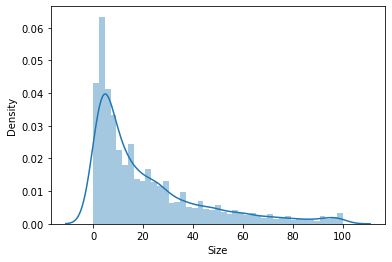

In [57]:
# to check if it was good method let's check before and after dist
sns.distplot(df["Size"])

<AxesSubplot:xlabel='Size', ylabel='Density'>

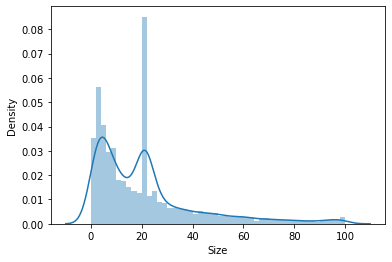

In [58]:
sns.distplot(df_copy_me['Size'].fillna(df_copy_me['Size'].mean()))

In [59]:
# distribution change so not good with mean

In [60]:
# for median

<AxesSubplot:xlabel='Size', ylabel='Density'>

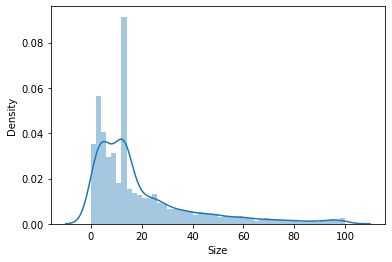

In [61]:
sns.distplot(df_copy_me['Size'].fillna(df_copy_me['Size'].median()))

### Random sample imputation

In [62]:
df_random = df.copy()

In [67]:
df_random['Size'].isnull().sum()

1526

In [72]:
random_sample = df_random['Size'].dropna().sample(df_random['Size'].isnull().sum())

In [73]:
random_sample

4646     1.9
9491    12.0
9797     1.7
6166     6.2
9282     4.4
        ... 
9336    61.0
2477     5.6
8275     2.2
1744    11.0
3726    17.0
Name: Size, Length: 1526, dtype: float64

In [80]:
random_sample_indexes = df_random[df_random["Size"].isnull()].index

In [82]:
df_random.loc[df_random['Size'].isnull() ,'Size'] = random_sample

In [84]:
df_random['Size'].isnull().sum()

1526